<a href="https://colab.research.google.com/github/TuanKiet1774/ThuatToanAI/blob/main/DetectPest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kết nối với Drive

Kết nối với Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Giải nén file Zip đến thư mục chỉ định

In [ ]:
%%bash
unzip /content/drive/MyDrive/OBD-HETTNT/Pest.v2i.yolov11.zip -d /content/drive/MyDrive/OBD-HETTNT

Archive:  /content/drive/MyDrive/OBD-HETTNT/Pest.v2i.yolov11.zip
  inflating: /content/drive/MyDrive/OBD-HETTNT/README.dataset.txt  
  inflating: /content/drive/MyDrive/OBD-HETTNT/README.roboflow.txt  
  inflating: /content/drive/MyDrive/OBD-HETTNT/data.yaml  
   creating: /content/drive/MyDrive/OBD-HETTNT/test/
   creating: /content/drive/MyDrive/OBD-HETTNT/test/images/
 extracting: /content/drive/MyDrive/OBD-HETTNT/test/images/8-Adult-of-Mexican-bean-weevil-Zabrotes-subfasciatus-a-dorsal-view-b-lateral-view_png.rf.80831be20454764bf0c0ae3aa9738617.jpg  
 extracting: /content/drive/MyDrive/OBD-HETTNT/test/images/LABAUR4I3JIUNK7CKHVBGRPKRY_jpg.rf.93302e8e73dbd03851ff3594b34ea569.jpg  
 extracting: /content/drive/MyDrive/OBD-HETTNT/test/images/Lucerne-feeding-aphids-cowpea-aphids-Aphis-craccivora-top-left-bluegreen-aphids_png.rf.7d9b3b4d06758061de106d851fd496a7.jpg  
 extracting: /content/drive/MyDrive/OBD-HETTNT/test/images/armyworm-1_jpg.rf.7554d1cd3035edef40ea56f0cce6b89b.jpg  
 extra

##Visual Anotate

Công thức tính:
(class) (tâm chéo (x,y)) (chiều dài) (chiều rộng)
Chia cho tỷ lệ khung hình

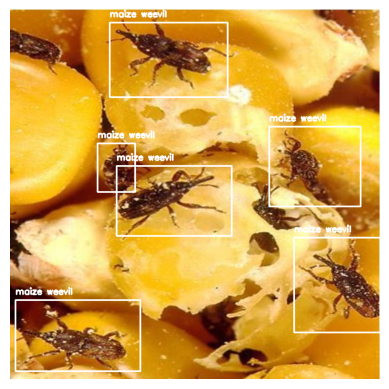

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the image and its corresponding annotation file
image_path = "/content/drive/MyDrive/OBD-HETTNT/train/images/2-Figure1-1_png.rf.59941ba058b3226147c1a79f549dbe93.jpg"
annotation_path = "/content/drive/MyDrive/OBD-HETTNT/train/labels/2-Figure1-1_png.rf.59941ba058b3226147c1a79f549dbe93.txt"

# Load the image
image = cv2.imread(image_path)
height, width, _ = image.shape

# Define colors for different class IDs (just using 3 classes here for example)
colors = {
    0: (0, 255, 0),  # Green for class 0
    1: (0, 0, 255),  # Red for class 1
    2: (255, 0, 0)   # Blue for class 2
}

# List of class names (partial Coco names for illustration, you can use the full list)
coco_names = ['African Armyworm', 'bean beetles', 'cowpea aphids', 'fall armyworm', 'maize weevil', 'white flies']

# Read the annotation file
with open(annotation_path, "r") as file:
    for line in file.readlines():
        # Each line: class_id x_center y_center width height
        parts = line.strip().split()
        class_id = int(parts[0])  # Class ID
        x_center = float(parts[1]) * width
        y_center = float(parts[2]) * height
        box_width = float(parts[3]) * width
        box_height = float(parts[4]) * height

        # Convert YOLO format to bounding box coordinates
        xmin = int(x_center - box_width / 2)
        ymin = int(y_center - box_height / 2)
        xmax = int(x_center + box_width / 2)
        ymax = int(y_center + box_height / 2)

        # Draw the rectangle and label on the image
        color = colors.get(class_id, (255, 255, 255))  # Default color: white
        class_name = coco_names[class_id]  # Get class name from coco_names
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
        cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display and save the image
plt.imshow(image_rgb)
plt.axis('off')  # Remove axes for better visual clarity
#plt.savefig('visual_IP038000453_with_labels.jpg', bbox_inches='tight', pad_inches=0)  # Save before showing
plt.show()
plt.close()

##Tải Yolo11 Ultralytics

Clone repo Ultrlytics về Drive

In [ ]:
%%bash
cd /content/drive/MyDrive/OBD-HETTNT
git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
Updating files: 100% (754/754), done.


Tải thư viện ultralytics

In [ ]:
%%bash
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

##Training tập dữ liệu

In [ ]:
%cd /content/drive/MyDrive/OBD-HETTNT/ultralytics
from ultralytics import YOLO
model = YOLO("yolo11n.yaml")
model.train(data="/content/drive/MyDrive/OBD-HETTNT/data.yaml", epochs=50, imgsz=640)

/content/drive/MyDrive/OBD-HETTNT/ultralytics
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/OBD-HETTNT/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,591,010 parameters, 2,590,994 gradients, 6.4 GFLOPs

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.2 ms, read: 10.4±6.4 MB/s, size: 46.8 KB)


train: Scanning /content/drive/MyDrive/OBD-HETTNT/train/labels... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:01<00:00, 118.47it/s]


train: New cache created: /content/drive/MyDrive/OBD-HETTNT/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 13.7±9.0 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/OBD-HETTNT/valid/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 59.23it/s]


val: New cache created: /content/drive/MyDrive/OBD-HETTNT/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G      3.171      4.556      4.253         33        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         45         68   0.000472      0.374    0.00119   0.000683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.82G      3.093      4.505      4.223         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         45         68    0.00143      0.429    0.00482    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.83G      3.115      4.499      4.207         28        640: 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         45         68    0.00108      0.302   0.000977   0.000458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.85G      3.161      4.506      4.189         44        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         45         68     0.0011      0.302    0.00124   0.000574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.86G      3.189      4.474      4.158         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         45         68    0.00105      0.302    0.00123   0.000583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.88G      3.135      4.448      4.118         26        640: 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         45         68    0.00106      0.302    0.00113    0.00054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.89G      3.123      4.456      4.101         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         45         68    0.00108      0.302    0.00102   0.000503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.91G      3.162      4.383       4.05         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


                   all         45         68    0.00113      0.302    0.00116   0.000552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.92G      3.158      4.353      4.011         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         45         68    0.00111      0.436    0.00202   0.000897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.94G       3.14      4.266      3.941         42        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


                   all         45         68   0.000484      0.357   0.000767   0.000438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.95G      3.041       4.24      3.857         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


                   all         45         68   0.000913      0.373    0.00115   0.000477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.97G      3.009      4.165      3.815         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         45         68   0.000726      0.381     0.0013     0.0005



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.98G      3.038      4.087      3.767         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         45         68     0.0023      0.581    0.00938    0.00247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         3G      2.918      4.048      3.694         32        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         45         68     0.0029      0.642     0.0475     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.01G      2.992      4.024      3.652         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         45         68    0.00335      0.657     0.0953     0.0448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.03G      2.919      4.043      3.634         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         45         68    0.00336      0.595     0.0679     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.04G      2.954      3.991       3.57         28        640: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         45         68      0.272     0.0749     0.0863     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.06G      2.923      3.935      3.564         35        640: 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         45         68      0.204     0.0794      0.049     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.07G       2.89       3.82      3.493         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]


                   all         45         68      0.248      0.117     0.0689     0.0193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.08G       2.85       3.92      3.498         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         45         68      0.418       0.15     0.0518     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.1G      2.833      3.869      3.476         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         45         68      0.616      0.136     0.0619     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.12G      2.786        3.8      3.446         34        640: 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         45         68      0.568      0.188     0.0562     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.13G      2.831      3.775      3.388         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         45         68       0.88     0.0652     0.0667      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.14G      2.871      3.817      3.369         33        640: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         45         68      0.397      0.177     0.0686     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.16G      2.772      3.732      3.323         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         45         68      0.421      0.133     0.0835     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.18G      2.694      3.789      3.332         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         45         68      0.368      0.129     0.0837      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.19G      2.677      3.691      3.316         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         45         68      0.398      0.176     0.0673     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.21G      2.642      3.697      3.313         26        640: 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all         45         68       0.41      0.104     0.0574     0.0145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.22G      2.652      3.696      3.254         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         45         68      0.822     0.0962      0.124      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.23G      2.626      3.642      3.246         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


                   all         45         68      0.612      0.102      0.132     0.0294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.25G      2.566      3.695      3.292         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         45         68      0.572      0.129      0.107     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.26G      2.514      3.688      3.228         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         45         68      0.237      0.171     0.0964     0.0211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.28G      2.447      3.689      3.171         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


                   all         45         68      0.271      0.191     0.0748     0.0195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.29G      2.465      3.629      3.187         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         45         68      0.206      0.121     0.0511     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.31G       2.48       3.65      3.151         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


                   all         45         68      0.432      0.146        0.1     0.0302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.32G      2.534       3.63      3.114         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         45         68      0.418      0.169     0.0912     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.34G      2.403      3.579      3.133         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         45         68      0.381      0.141     0.0902     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.35G       2.51      3.553      3.135         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         45         68      0.607      0.135      0.115     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.37G      2.463      3.521      3.123         44        640: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         68      0.374      0.117     0.0876     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.38G      2.494      3.568      3.072         31        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         45         68      0.615       0.15      0.151     0.0589


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.4G      2.402      3.769      3.196         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         45         68      0.637       0.19      0.172     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.41G      2.395      3.621      3.198         16        640: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         45         68      0.681      0.266      0.235     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.43G      2.284      3.565      3.145         21        640: 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


                   all         45         68      0.775      0.199      0.226      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.44G      2.295      3.635      3.179         20        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         45         68      0.502      0.258      0.219      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.45G      2.302      3.505      3.189         19        640: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         45         68      0.647      0.258      0.247     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.47G      2.258      3.603      3.233         21        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         68      0.613      0.248      0.265     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.49G      2.271      3.509      3.136         19        640: 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         45         68       0.57      0.226      0.268      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       3.5G      2.266      3.607      3.171         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         45         68      0.633      0.268      0.265     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.52G      2.177      3.485      3.114         18        640: 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         68      0.703      0.292       0.26     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.53G       2.25      3.479      3.115         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         45         68      0.767      0.275      0.269      0.104

50 epochs completed in 0.057 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         45         68       0.76      0.268      0.265      0.103
      African Armyworm         16         21      0.514      0.286      0.319      0.124
          bean beetles          6          6          1          0     0.0493     0.0254
         cowpea aphids          6         10          1          0      0.141     0.0198
         fall armyworm          1          1          1          0     0.0498     0.0205
          maize weevil          7          7      0.799      0.714       0.75      0.319
           white flies          9         23      0.246      0.609      0.279      0.106
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c259a3bfb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

##Train với hệ số có sẵn

In [ ]:
%cd /content/drive/MyDrive/OBD-HETTNT/ultralytics
from ultralytics import YOLO
model = YOLO("yolo11n.yaml")
model = YOLO("yolo11n.pt")
model = YOLO("yolo11n.yaml").load("yolo11n.pt")
model.train(data="/content/drive/MyDrive/OBD-HETTNT/data.yaml", epochs=50, imgsz=640)

/content/drive/MyDrive/OBD-HETTNT/ultralytics
Transferred 499/499 items from pretrained weights
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/OBD-HETTNT/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, o

train: Scanning /content/drive/MyDrive/OBD-HETTNT/train/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 40.6±8.7 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/OBD-HETTNT/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.31G      1.782      3.793       1.97         33        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         68     0.0343      0.562     0.0914     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.31G      1.405      3.633      1.728         30        640: 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         45         68     0.0511      0.585      0.151     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.31G       1.42      3.468      1.684         28        640: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         45         68     0.0224       0.81      0.147      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.31G      1.361      3.265       1.64         44        640: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         45         68     0.0166      0.865       0.12     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.31G      1.384      3.055      1.644         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         45         68     0.0113      0.915      0.276      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.31G       1.36      2.769      1.597         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


                   all         45         68      0.941     0.0764      0.322      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.31G      1.489      2.746      1.684         25        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         45         68      0.782      0.152       0.25      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.31G      1.421      2.545      1.612         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         45         68      0.638      0.194      0.254      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.31G       1.47      2.577      1.677         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         68      0.798      0.299      0.377      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.31G      1.438      2.433      1.647         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]


                   all         45         68      0.556      0.365      0.448      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.31G      1.424       2.27      1.624         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         45         68      0.624      0.434      0.438      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.31G      1.354      2.109      1.588         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         45         68      0.698      0.413      0.488      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.31G       1.42      2.173      1.626         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         45         68      0.671      0.401      0.475      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.31G      1.354      2.034      1.616         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


                   all         45         68       0.53      0.491      0.484      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.31G      1.406      2.091      1.666         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         45         68      0.584      0.476      0.484      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.31G      1.352      1.976       1.62         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         45         68      0.512      0.496      0.452      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.31G      1.314      1.968      1.576         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         45         68       0.73      0.403      0.486      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.31G      1.306       1.89      1.544         35        640: 100%|██████████| 10/10 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         45         68      0.611      0.503      0.516      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.31G      1.298      1.889      1.533         49        640: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         45         68      0.653      0.506       0.52      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.31G      1.285      1.864      1.574         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         45         68      0.546      0.535      0.477      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.31G      1.302      1.798      1.554         41        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         45         68      0.525      0.485      0.494      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.31G      1.277      1.814      1.559         34        640: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         45         68      0.658      0.491      0.513      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.31G      1.266      1.746      1.529         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         45         68      0.717      0.523      0.564      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.31G      1.262       1.71      1.517         33        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


                   all         45         68      0.553       0.58      0.502      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.31G      1.281      1.756      1.521         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         45         68       0.59       0.48      0.469      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.31G      1.197       1.68      1.493         36        640: 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         45         68      0.667       0.63      0.653      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.31G      1.235      1.632      1.486         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         45         68      0.705      0.628      0.621      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.31G      1.179      1.579      1.477         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         45         68      0.763      0.614      0.666      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.31G      1.176      1.533       1.43         26        640: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         45         68       0.72      0.704      0.681      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.31G      1.125      1.466      1.426         34        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         45         68      0.764      0.641      0.673      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.31G      1.147      1.481      1.434         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         45         68      0.765      0.614      0.646      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.31G      1.127      1.526      1.429         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         45         68      0.781      0.625      0.688       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.31G      1.095      1.485      1.419         36        640: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         45         68      0.822      0.644      0.704      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.31G       1.06      1.384       1.38         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         45         68      0.823      0.594      0.667      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.31G      1.098      1.474      1.399         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         45         68        0.7      0.598      0.637      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.31G      1.156      1.488      1.415         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         45         68      0.688      0.649      0.632      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.31G      1.031      1.307      1.346         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


                   all         45         68      0.774      0.672      0.697      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.31G      1.071      1.354      1.356         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         45         68      0.571       0.73       0.71       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.31G      1.042      1.312      1.352         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         45         68       0.81      0.673      0.719      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.31G      1.017      1.348      1.353         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         45         68      0.799      0.674      0.721      0.427


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.41G     0.9647      1.484      1.348         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         45         68      0.804      0.687       0.71        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.41G      0.893      1.375      1.276         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         45         68       0.85      0.616       0.67      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.41G     0.9146      1.353      1.305         21        640: 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         45         68      0.833      0.607       0.65      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.41G     0.9174      1.356      1.304         20        640: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         45         68      0.795      0.605      0.639      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.41G     0.8592       1.31      1.268         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


                   all         45         68      0.823      0.572      0.669      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.41G     0.8732      1.336      1.312         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


                   all         45         68      0.843      0.575      0.713      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.41G     0.8596      1.247      1.265         19        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         45         68      0.868      0.573      0.707      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.41G     0.8619      1.292      1.286         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


                   all         45         68      0.797      0.656      0.716      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.41G      0.789      1.234      1.223         18        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


                   all         45         68      0.783      0.706      0.717      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.41G     0.8036      1.263      1.268         12        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         68      0.789      0.719      0.717      0.437



50 epochs completed in 0.057 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


                   all         45         68      0.843      0.575      0.712      0.444
      African Armyworm         16         21      0.901      0.857      0.919      0.628
          bean beetles          6          6          1      0.557      0.942      0.542
         cowpea aphids          6         10      0.695        0.7      0.806      0.459
         fall armyworm          1          1          1          0     0.0711     0.0497
          maize weevil          7          7      0.717      0.727       0.75      0.621
           white flies          9         23      0.748      0.609      0.785      0.364
Speed: 0.4ms preprocess, 3.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c259a1cba90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

Predict

In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2
import os
import glob

# Load model
model = YOLO("/content/drive/MyDrive/OBD-HETTNT/ultralytics/runs/detect/train2/weights/best.pt")

# Get class names from the model
names = model.names

# Generate palette
def get_palette(num_classes):
    np.random.seed(42)
    return [tuple(np.random.randint(0, 256, size=3).tolist()) for _ in range(num_classes)]

palette = get_palette(len(names))

# Input/output folders
input_dir = '/content/drive/MyDrive/OBD-HETTNT/test/images'
output_dir = '/content/drive/MyDrive/OBD-HETTNT/Predict_DetectPest'
os.makedirs(output_dir, exist_ok=True)

# Get all image paths
image_paths = glob.glob(os.path.join(input_dir, '*.jpg'))

for img_path in image_paths:
    image = cv2.imread(img_path)
    img_name = os.path.basename(img_path)
    out_path = os.path.join(output_dir, img_name)

    results = model(img_path)[0]

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        cls_name = names[cls_id]  # Get class name using the class ID

        color = palette[cls_id % len(palette)]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        text = f'{cls_name} {conf:.2f}' # Use cls_name here
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)


    cv2.imwrite(out_path, image)

print(f'✅ Done. Visualized results saved to: {output_dir}')


image 1/1 /content/drive/MyDrive/OBD-HETTNT/test/images/8-Adult-of-Mexican-bean-weevil-Zabrotes-subfasciatus-a-dorsal-view-b-lateral-view_png.rf.80831be20454764bf0c0ae3aa9738617.jpg: 640x640 2 bean beetless, 21.2ms
Speed: 3.0ms preprocess, 21.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/OBD-HETTNT/test/images/LABAUR4I3JIUNK7CKHVBGRPKRY_jpg.rf.93302e8e73dbd03851ff3594b34ea569.jpg: 640x640 1 bean beetles, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/OBD-HETTNT/test/images/Lucerne-feeding-aphids-cowpea-aphids-Aphis-craccivora-top-left-bluegreen-aphids_png.rf.7d9b3b4d06758061de106d851fd496a7.jpg: 640x640 4 cowpea aphidss, 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/OBD-HETTNT/test/images/armyworm-1_jpg.rf.7554d1cd3035edef40ea56f0cce6b89b.jpg: 640x6